In [1]:
import pandas as pd
import os

In [2]:
data = pd.read_csv('data\\test.csv')
print(data)

             point.id motherset      origin  original.label  diff.score  \
0     wine_point_3594      wine  regression               7    0.050492   
1     wine_point_5089      wine  regression               5    0.082237   
2     wine_point_1912      wine  regression               6    0.290201   
3     wine_point_4908      wine  regression               5    0.053559   
4     wine_point_2246      wine  regression               7    0.420300   
...               ...       ...         ...             ...         ...   
3698  wine_point_2856      wine  regression               7    0.012963   
3699  wine_point_3776      wine  regression               6    0.011138   
3700  wine_point_5027      wine  regression               7    0.066310   
3701  wine_point_2620      wine  regression               6    0.621226   
3702  wine_point_5748      wine  regression               5    0.151189   

     ground.truth  fixed.acidity  volatile.acidity  citric.acid  \
0         nominal      -1.245962

In [3]:
'''
creat y_true
'''

ground_truth = data['ground.truth'].values
ground_truth[ground_truth == 'nominal'] = 0
ground_truth[ground_truth == 'anomaly'] = 1
y = ground_truth.astype(int)
print(y)

[0 1 0 ... 0 0 1]


In [4]:
'''
creat x
'''
x = data.values[:, 6:].astype(float)
print(x)
print(x.shape)

[[-1.2459619  -0.36241058 -0.26585317 ...  0.8178459  -0.61333787
   0.1745595 ]
 [ 0.75953972  0.97386683  0.21584947 ...  0.07151784  0.5962918
  -0.91539371]
 [-0.08894173 -0.9698094  -0.4034825  ... -1.11016825  1.40271158
  -0.49618094]
 ...
 [ 0.60527037  1.52052576 -1.09162914 ...  1.25320393  2.61234125
   0.00687439]
 [-0.47461512  0.0627686   0.21584947 ... -0.73700422 -0.41173293
  -0.91539371]
 [-0.62888448  1.76348529 -0.74755582 ...  2.248308    0.86509839
  -0.58002349]]
(3703, 11)


In [5]:
'''
三个常用的模型
'''
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from pyod.models.pca import PCA

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.manifold import TSNE
import os


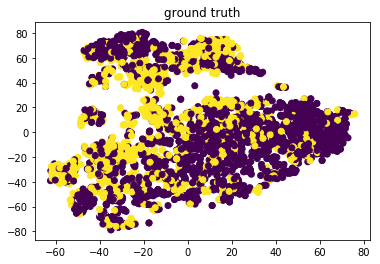

******* KNN *******
auc:  0.5500125623131871
prediction:  0.6367809883877937
******* ABOD *******
auc:  0.5328316213358074
prediction:  0.6302997569538212
******* PCA *******
auc:  0.5418258578604325
prediction:  0.6308398595733189


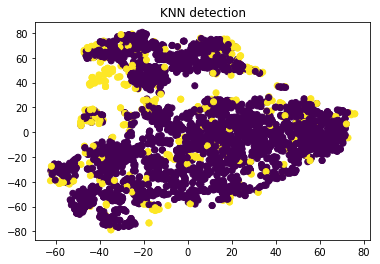

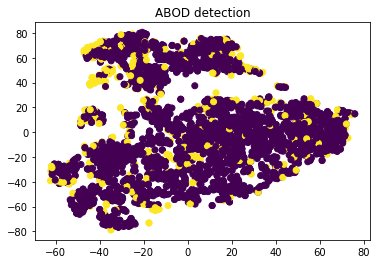

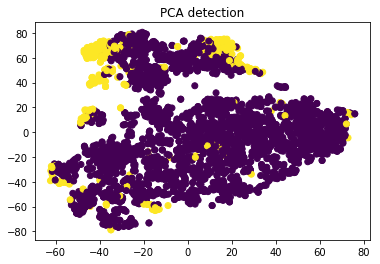

In [6]:
'''
三个模型的检测结果
以AUC和Prediction为评价指标
并可视化
'''
models = {
    'KNN':KNN(),
    'ABOD':ABOD(n_neighbors=10),
    'PCA': PCA()
}

x_tsne = TSNE().fit_transform(x)
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
plt.title('ground truth')
plt.show()

for name, model in models.items():
    model.fit(x)
    y_pred, y_scores = model.labels_, model.decision_scores_
    print('*******', name,'*******')
    print('auc: ', roc_auc_score(y, y_scores))
    print('prediction: ', accuracy_score(y, y_pred))
    
    plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_pred)
    plt.title(name + ' detection')
    plt.show()
    

In [7]:
'''
将上述代码集成为一个函数，将不同的benchmark导入执行
'''

def detection_analysis(pd_file):
    
    ground_truth = pd_file['ground.truth'].values
    ground_truth[ground_truth == 'nominal'] = 0
    ground_truth[ground_truth == 'anomaly'] = 1
    y = ground_truth.astype(int)
    x = data.values[:, 6:].astype(float)
    
    models = {
    'KNN':KNN(),
    'ABOD':ABOD(n_neighbors=10),
    'PCA': PCA()
    }
    x_tsne = TSNE().fit_transform(x)
    plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
    plt.title('ground truth')
    plt.show()
    
    for name, model in models.items():
        model.fit(x)
        y_pred, y_scores = model.labels_, model.decision_scores_
        print('*******', name,'*******')
        print('auc: ', roc_auc_score(y, y_scores))
        print('prediction: ', accuracy_score(y, y_pred))
        
        plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_pred)
        plt.title(name + ' detection')
        plt.show()

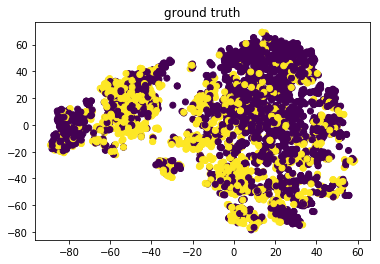

******* KNN *******
auc:  0.5500125623131871
prediction:  0.6367809883877937
******* ABOD *******
auc:  0.5328316213358074
prediction:  0.6302997569538212
******* PCA *******
auc:  0.5418258578604325
prediction:  0.6308398595733189


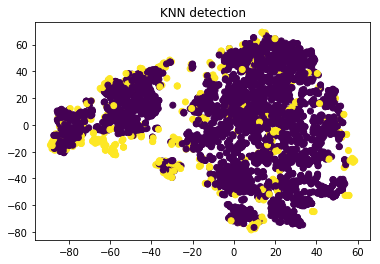

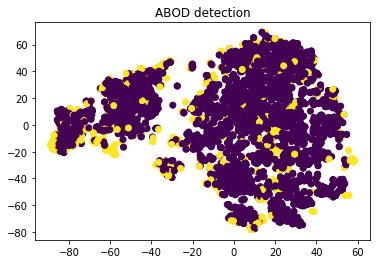

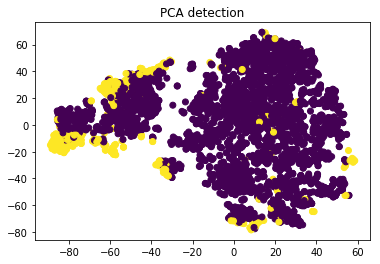

In [9]:
path = 'benchmarks\\'
files = os.listdir(path)
for file in files:
    pd_file = pd.read_csv(path + file)
    detection_analysis(pd_file)
    
